<a href="https://colab.research.google.com/github/Albertussagung/Studi-Independen/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.949113,0.531987,0.428075,0.784940,0.654329,0.452788,0.780788,0.011738,0.129721,0.052975,B
1,0.985863,0.416837,0.975945,0.047515,0.881044,0.177223,0.841657,0.226582,0.845673,0.658555,A
2,0.789584,0.619157,0.220900,0.163094,0.292010,0.990741,0.107449,0.294708,0.081595,0.899716,B
3,0.762440,0.256908,0.453193,0.916255,0.264190,0.734428,0.140914,0.574274,0.197431,0.658115,A
4,0.470532,0.775917,0.403909,0.328682,0.056843,0.746140,0.814515,0.719390,0.130866,0.902346,A


In [2]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [3]:
y = df.loc[:,['label']].values

In [4]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.949113,0.531987,0.428075,0.784940,0.654329,0.452788,0.780788,0.011738,0.129721,0.052975
1,0.985863,0.416837,0.975945,0.047515,0.881044,0.177223,0.841657,0.226582,0.845673,0.658555
2,0.789584,0.619157,0.220900,0.163094,0.292010,0.990741,0.107449,0.294708,0.081595,0.899716
3,0.762440,0.256908,0.453193,0.916255,0.264190,0.734428,0.140914,0.574274,0.197431,0.658115
4,0.470532,0.775917,0.403909,0.328682,0.056843,0.746140,0.814515,0.719390,0.130866,0.902346


In [5]:
pca = PCA(n_components=2)

In [6]:
principalComponents = pca.fit_transform(x)

In [7]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [8]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.747341,-0.077447
1,-0.181233,0.757071
2,0.123393,0.217177
3,-0.056755,-0.369442
4,0.331781,-0.097408


In [9]:
df[['label']].head()

,label
0,B
1,A
2,B
3,A
4,A


In [10]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,-0.747341,-0.077447,B
1,-0.181233,0.757071,A
2,0.123393,0.217177,B
3,-0.056755,-0.369442,A
4,0.331781,-0.097408,A


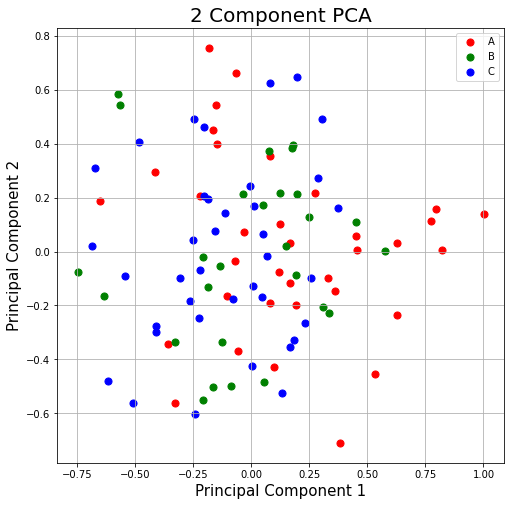

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()